In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [3]:
ds=pd.read_csv('University advancement dataset.csv')

In [4]:
ds.shape

(50000, 16)

In [5]:
ds.head()

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,"$73,600",1997.0,1978.0,"$22,080",0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,"$8,035",1962.0,1961.0,"$1,768",14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,"$9,675",1961.0,1961.0,"$3,483",15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,"$4,070",1990.0,1986.0,"$2,768",14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,"$13,377",1970.0,1957.0,"$3,077",0,N,0,16


In [6]:
ds.isna().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [7]:
ds.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [8]:
ds.drop_duplicates()

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,"$73,600",1997.0,1978.0,"$22,080",0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,"$8,035",1962.0,1961.0,"$1,768",14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,"$9,675",1961.0,1961.0,"$3,483",15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,"$4,070",1990.0,1986.0,"$2,768",14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,"$13,377",1970.0,1957.0,"$3,077",0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,M,Graduate,Engineer -- General,1960,ON,"$9,174",1970.0,1969.0,"$5,504",15,Y,1,1
49996,149997,NaN,E,F,Graduate,Arts -- General,1992,MB,"$38,181",1999.0,1993.0,"$35,890",8,N,1,20
49997,149998,NaN,E,F,Graduate,Arts -- General,1974,QC,$0,NaN,NaN,NaN,3,Y,2,5
49998,149999,NaN,E,M,Graduate,Arts -- General,1967,ON,$0,NaN,NaN,NaN,1,N,0,12


In [9]:
ds.replace(',','', regex=True, inplace=True)
ds['Lifetime Giving'] = ds['Lifetime Giving'].str.replace(r'\$', '').astype('float')
ds['Largest Gift'] = ds['Largest Gift'].str.replace(r'\$', '').astype('float')

In [13]:
ds.dtypes

ID Number                           int64
Title                              object
Preferred Language                 object
Gender                             object
Relationship Types                 object
Faculty of Graduation              object
Year of Graduation                  int64
Province                           object
Lifetime Giving                   float64
Year of Last Gift                 float64
Year of First Gift                float64
Largest Gift                      float64
Events Attended in Lifetime         int64
Past Traveler Y/N                  object
# of Instances of Volunteering      int64
# of Clicks in the Past Month       int64
dtype: object

In [14]:
ds["ID Number"].unique()

array([100001, 100002, 100003, ..., 149998, 149999, 150000], dtype=int64)

In [15]:
ds["Title"].unique()

array([nan, 'President', 'CEO', 'Chairman CEO'], dtype=object)

In [16]:
ds["Preferred Language"].unique()

array(['E', ' ', 'F'], dtype=object)

In [17]:
ds["Gender"].unique()

array(['M', 'F', 'U'], dtype=object)

In [18]:
ds["Relationship Types"].unique()

array(['Graduate', 'Graduate Former Faculty/Staff',
       'Graduate Past Student',
       'Graduate Past Parent Former Faculty/Staff',
       'Graduate Former Faculty/Staff Past Student',
       'Graduate Past Parent', 'Graduate Current Parent',
       'Graduate Student', 'Graduate Faculty/Staff',
       'Graduate Grandparent Past Parent',
       'Graduate Former Faculty/Staff Student', 'Graduate Grandparent',
       'Graduate Past Parent Faculty/Staff',
       'Graduate Grandparent Former Faculty/Staff',
       'Graduate Faculty/Staff Past Student',
       'Graduate Grandparent Past Parent Former Faculty/Staff',
       'Graduate Current Parent Faculty/Staff',
       'Graduate Current Parent Former Faculty/Staff',
       'Graduate Current Parent Past Student',
       'Graduate Widow/er of a Grad', 'Graduate Past Parent Past Student'],
      dtype=object)

In [19]:
ds["Faculty of Graduation"].unique()

array(['Medicine -- General', 'Arts -- General', 'Science -- General',
       'Education -- General', 'Management', 'Engineer -- General',
       'Engineer -- Architect', 'Medicine -- Nursing', 'Law',
       'Agr&Env -- General', 'Medicine -- POT', 'Agr&Env -- Dietetics',
       'Arts -- Social Work', 'Arts -- Information (Library) Studies',
       'Dentistry', 'Music', 'Religious Studies', 'Continuing Education',
       'Engineer -- Urban', 'Medicine -- Com Sci', 'Arts -- MSE',
       'Science -- Computer', 'Science -- MSE', 'Agr&Env -- MSE',
       'UNKNOWN'], dtype=object)

In [20]:
ds["Year of Graduation"].unique()

array([1968, 1958, 1963, 1960, 1955, 1969, 1970, 1959, 1965, 1954, 1967,
       1966, 1957, 1962, 1964, 1953, 1961, 1972, 1952, 1974, 1949, 1956,
       1973, 1951, 1971, 1948, 1950, 1943, 1976, 1978, 1944, 1939, 1947,
       1977, 1945, 1940, 1975, 1946, 1979, 1982, 1981, 1980, 1983, 1984,
       1987, 1986, 1988, 1990, 1985, 1989, 1993, 1991, 1992, 1994, 1996,
       1995, 2000, 1999, 1997, 1998, 2004, 2001, 2006, 2002, 2003, 2005,
       2008, 2009, 2012, 2007, 2010, 2013, 2011, 2014, 2015, 1934, 1941,
       1942, 1933, 1937, 1929], dtype=int64)

In [21]:
ds["Province"].unique()

array(['ON', 'NB', 'BC', 'QC', 'SK', 'NS', 'AB', 'MB', 'NL', 'PE', 'NT',
       'YT'], dtype=object)

In [24]:
ds["Past Traveler Y/N"].unique()

array(['N', 'Y'], dtype=object)

In [25]:
ds['Title']=ds['Title'].fillna('NO Title')

# Exploratory Data Analysis

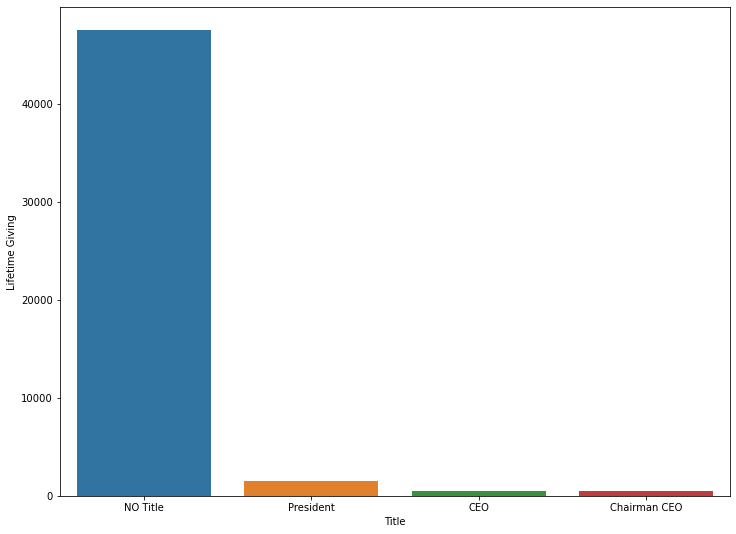

In [26]:
plt.figure(figsize=(12,9))
sns.barplot(data=ds,x='Title',y='Lifetime Giving',estimator=len)
plt.show()

In [10]:
ds.drop(['ID Number', 'Title', 'Past Traveler Y/N'],axis=1, inplace=True)

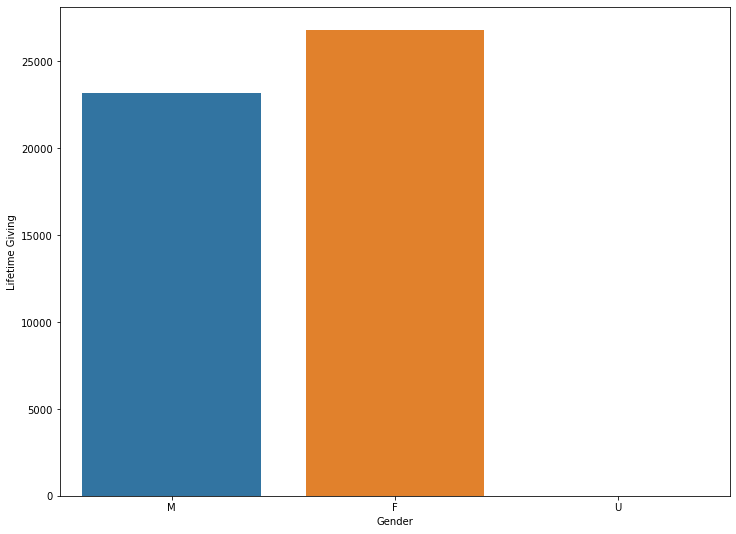

In [28]:
plt.figure(figsize=(12,9))
sns.barplot(data=ds,x='Gender',y='Lifetime Giving',estimator=len)
plt.show()

<AxesSubplot:ylabel='Gender'>

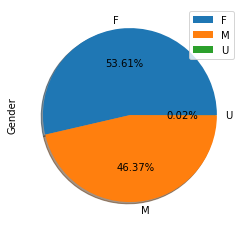

In [29]:
ds.Gender.value_counts().plot.pie(shadow=True,autopct='%.2f%%',legend=True)

<AxesSubplot:ylabel='Faculty of Graduation'>

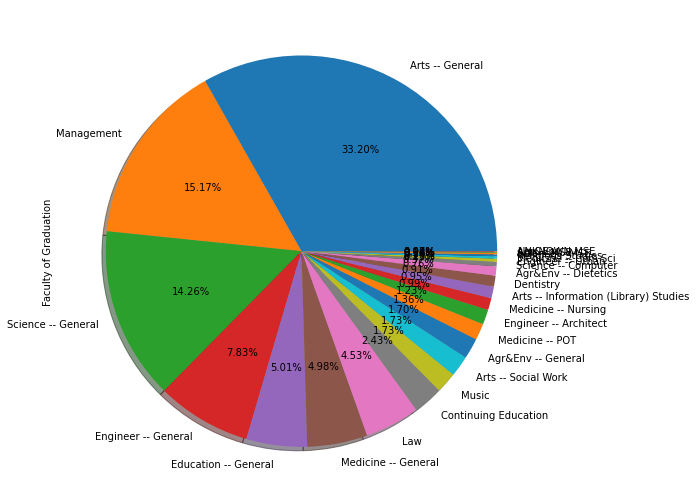

In [30]:
plt.figure(figsize=(12,9))
ds['Faculty of Graduation'].value_counts().plot.pie(shadow=True,autopct='%.2f%%',legend=False)

<AxesSubplot:ylabel='Relationship Types'>

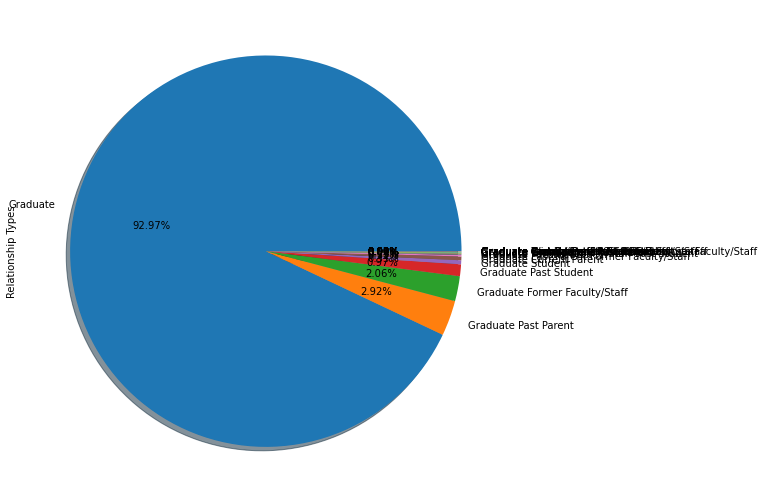

In [31]:
plt.figure(figsize=(12,9))
ds['Relationship Types'].value_counts().plot.pie(shadow=True,autopct='%.2f%%',legend=False)

In [11]:
q = ds['Lifetime Giving'].quantile(0.99)

In [12]:
dse= ds[ds['Lifetime Giving']< q]

dse.reset_index(inplace=True)
dse.describe()

,index,Year of Graduation,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
count,49500.000000,49500.000000,49500.000000,15586.000000,15586.000000,15588.000000,49500.000000,49500.000000,49500.000000
mean,24958.337616,1985.145253,2950.988848,1991.822790,1985.830553,4610.605273,7.494485,1.285374,12.032747
std,14403.128358,20.847368,8822.759252,17.849836,18.280058,8165.431000,4.592380,1.160391,6.842061
min,1.000000,1929.000000,0.000000,1934.000000,1933.000000,0.000000,0.000000,0.000000,0.000000
25%,12491.750000,1970.000000,0.000000,1979.000000,1973.000000,49.000000,4.000000,0.000000,6.000000
50%,24875.500000,1989.000000,0.000000,1995.000000,1988.000000,437.000000,8.000000,1.000000,13.000000
75%,37427.250000,2003.000000,100.000000,2007.000000,2001.000000,5425.250000,11.000000,2.000000,18.000000
max,49999.000000,2015.000000,46988.000000,2015.000000,2015.000000,45571.000000,15.000000,3.000000,23.000000


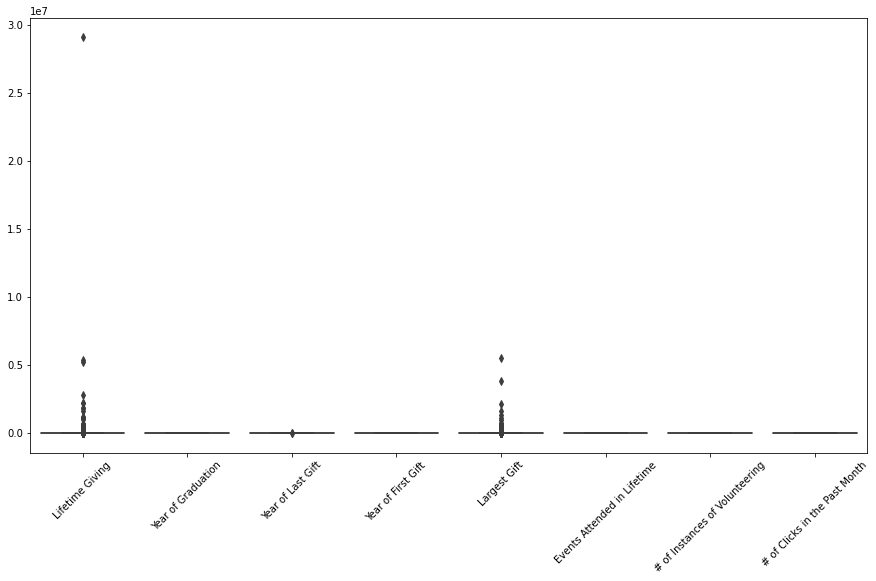

In [39]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=ds[['Lifetime Giving', 'Year of Graduation', 'Year of Last Gift', 'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
             '# of Instances of Volunteering', '# of Clicks in the Past Month']])
plt.xticks(rotation=45)
plt.show()

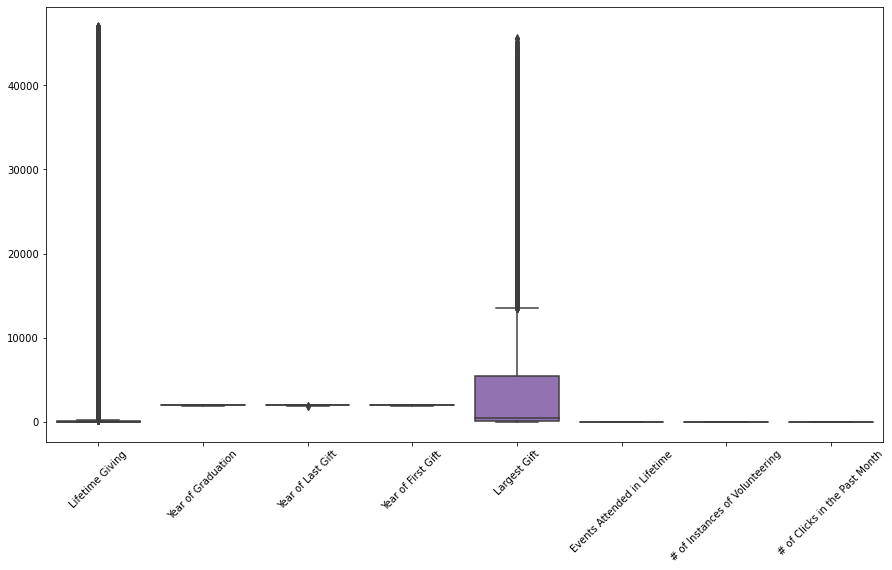

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=dse[['Lifetime Giving', 'Year of Graduation', 'Year of Last Gift', 'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
             '# of Instances of Volunteering', '# of Clicks in the Past Month']])
plt.xticks(rotation=45)
plt.show()

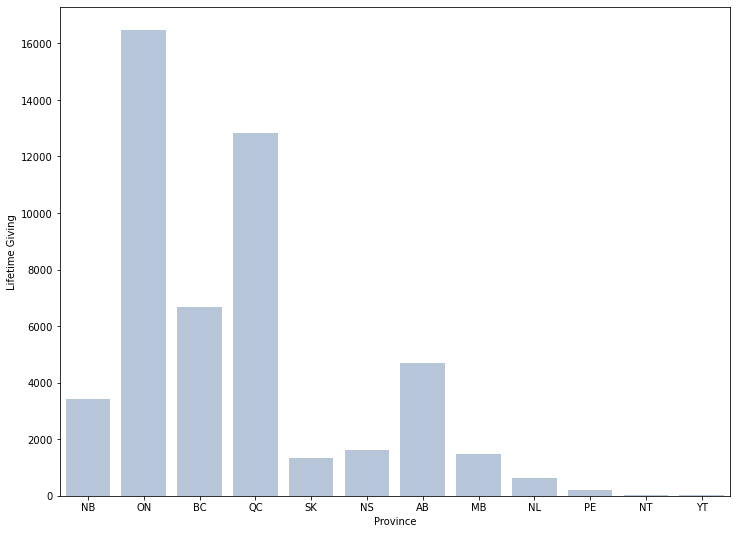

In [37]:
plt.figure(figsize=(12,9))
sns.barplot(data=dse,x='Province',y='Lifetime Giving',estimator=len, color = "lightsteelblue")
plt.show()

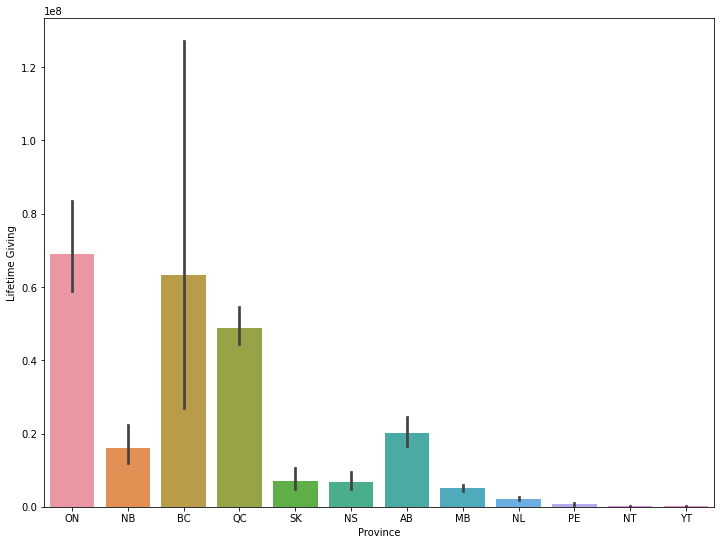

In [38]:
plt.figure(figsize=(12,9))
sns.barplot(data=ds,x='Province',y='Lifetime Giving',estimator=sum)
plt.show()


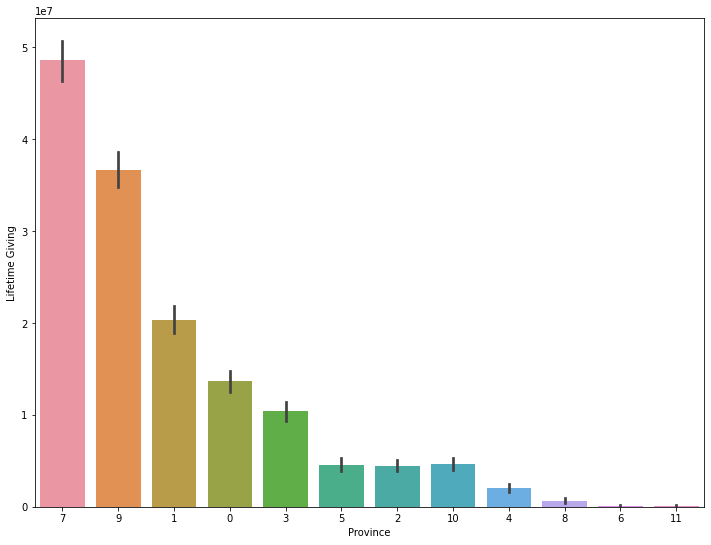

In [19]:
plt.figure(figsize=(12,9))
sns.barplot(data=X,x='Province',y='Lifetime Giving',estimator=sum,order= X['Province'].value_counts().index)
plt.show()

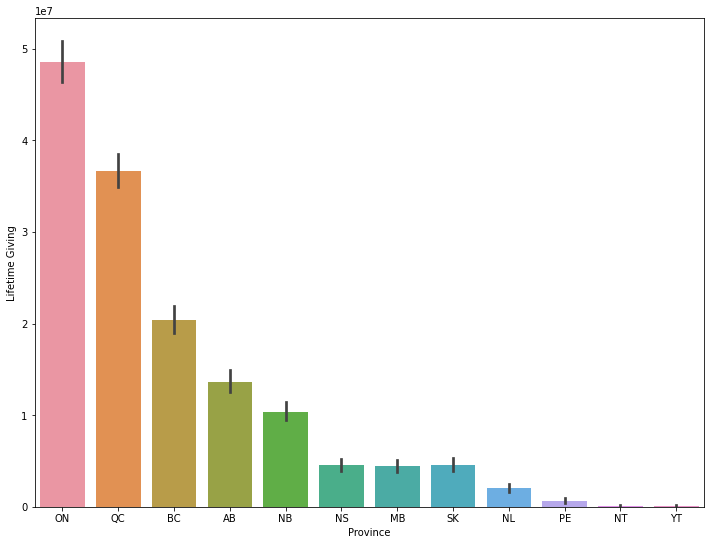

In [21]:
plt.figure(figsize=(12,9))
sns.barplot(data=dse,x='Province',y='Lifetime Giving',estimator=sum,order= dse['Province'].value_counts().index)
plt.show()

In [15]:
le.classes_

array(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PE', 'QC', 'SK',
       'YT'], dtype=object)

# data cleaning

<AxesSubplot:xlabel='Lifetime Giving', ylabel='Density'>

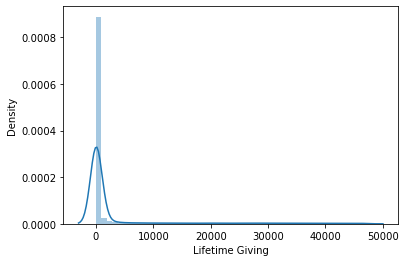

In [41]:
sns.distplot(dse['Lifetime Giving'])

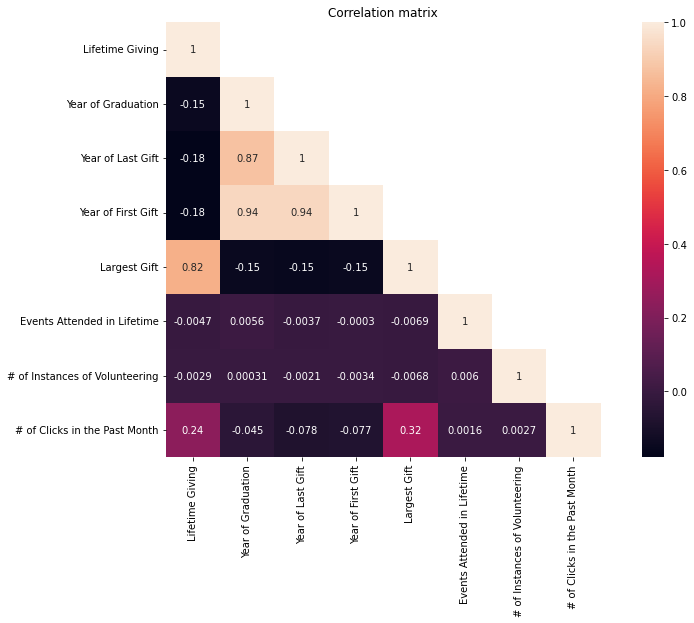

,Lifetime Giving,Year of Graduation,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
Lifetime Giving,1.000000,-0.145589,-0.178653,-0.175638,0.817186,-0.004658,-0.002854,0.240145
Year of Graduation,-0.145589,1.000000,0.871190,0.936415,-0.146950,0.005554,0.000309,-0.045048
Year of Last Gift,-0.178653,0.871190,1.000000,0.936096,-0.153138,-0.003712,-0.002081,-0.078129
Year of First Gift,-0.175638,0.936415,0.936096,1.000000,-0.147056,-0.000296,-0.003426,-0.076830
Largest Gift,0.817186,-0.146950,-0.153138,-0.147056,1.000000,-0.006913,-0.006798,0.320259
Events Attended in Lifetime,-0.004658,0.005554,-0.003712,-0.000296,-0.006913,1.000000,0.005971,0.001614
# of Instances of Volunteering,-0.002854,0.000309,-0.002081,-0.003426,-0.006798,0.005971,1.000000,0.002749
# of Clicks in the Past Month,0.240145,-0.045048,-0.078129,-0.076830,0.320259,0.001614,0.002749,1.000000


In [42]:
correMtr=dse[['Lifetime Giving', 'Year of Graduation', 'Year of Last Gift', 'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
             '# of Instances of Volunteering', '# of Clicks in the Past Month']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=1,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix')
plt.show()

ContinuousCols=['Lifetime Giving', 'Year of Graduation', 'Year of Last Gift', 'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
             '# of Instances of Volunteering', '# of Clicks in the Past Month']

CorrelationData=dse[ContinuousCols].corr()
CorrelationData

In [43]:
CorrelationData['Lifetime Giving'][abs(CorrelationData['Lifetime Giving']) > 0.1 ]

Lifetime Giving                  1.000000
Year of Graduation              -0.145589
Year of Last Gift               -0.178653
Year of First Gift              -0.175638
Largest Gift                     0.817186
# of Clicks in the Past Month    0.240145
Name: Lifetime Giving, dtype: float64

## Clustering

In [13]:
X = dse[['Preferred Language','Gender','Relationship Types','Faculty of Graduation','Province','Lifetime Giving','Events Attended in Lifetime',
       '# of Instances of Volunteering', '# of Clicks in the Past Month']]

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Preferred Language'] = le.fit_transform(X['Preferred Language'])
X['Gender'] = le.fit_transform(X['Gender'])
X['Relationship Types'] = le.fit_transform(X['Relationship Types'])
X['Faculty of Graduation'] = le.fit_transform(X['Faculty of Graduation'])
X['Province'] = le.fit_transform(X['Province'])

In [15]:
le.classes_

array(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PE', 'QC', 'SK',
       'YT'], dtype=object)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Preferred Language              49500 non-null  int32  
 1   Gender                          49500 non-null  int32  
 2   Relationship Types              49500 non-null  int32  
 3   Faculty of Graduation           49500 non-null  int32  
 4   Province                        49500 non-null  int32  
 5   Lifetime Giving                 49500 non-null  float64
 6   Events Attended in Lifetime     49500 non-null  int64  
 7   # of Instances of Volunteering  49500 non-null  int64  
 8   # of Clicks in the Past Month   49500 non-null  int64  
dtypes: float64(1), int32(5), int64(3)
memory usage: 2.5 MB


In [47]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)

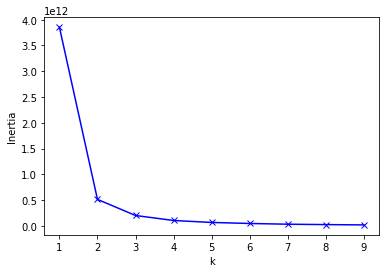

In [48]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3).fit(X)

In [40]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledColleges = pd.concat((X,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [41]:
labeledColleges

,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Province,Lifetime Giving,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month,labels
0,1,1,0,3,3,8035.0,14,1,19,0
1,1,0,0,22,7,9675.0,15,1,18,2
2,0,1,0,9,1,4070.0,14,2,10,0
3,1,1,0,14,9,13377.0,0,0,16,2
4,1,1,0,11,10,1890.0,15,3,16,0
...,...,...,...,...,...,...,...,...,...,...
49495,1,1,0,11,7,9174.0,15,1,1,2
49496,1,0,0,3,2,38181.0,8,1,20,1
49497,1,0,0,3,9,0.0,3,2,5,0
49498,1,1,0,3,7,0.0,1,0,12,0


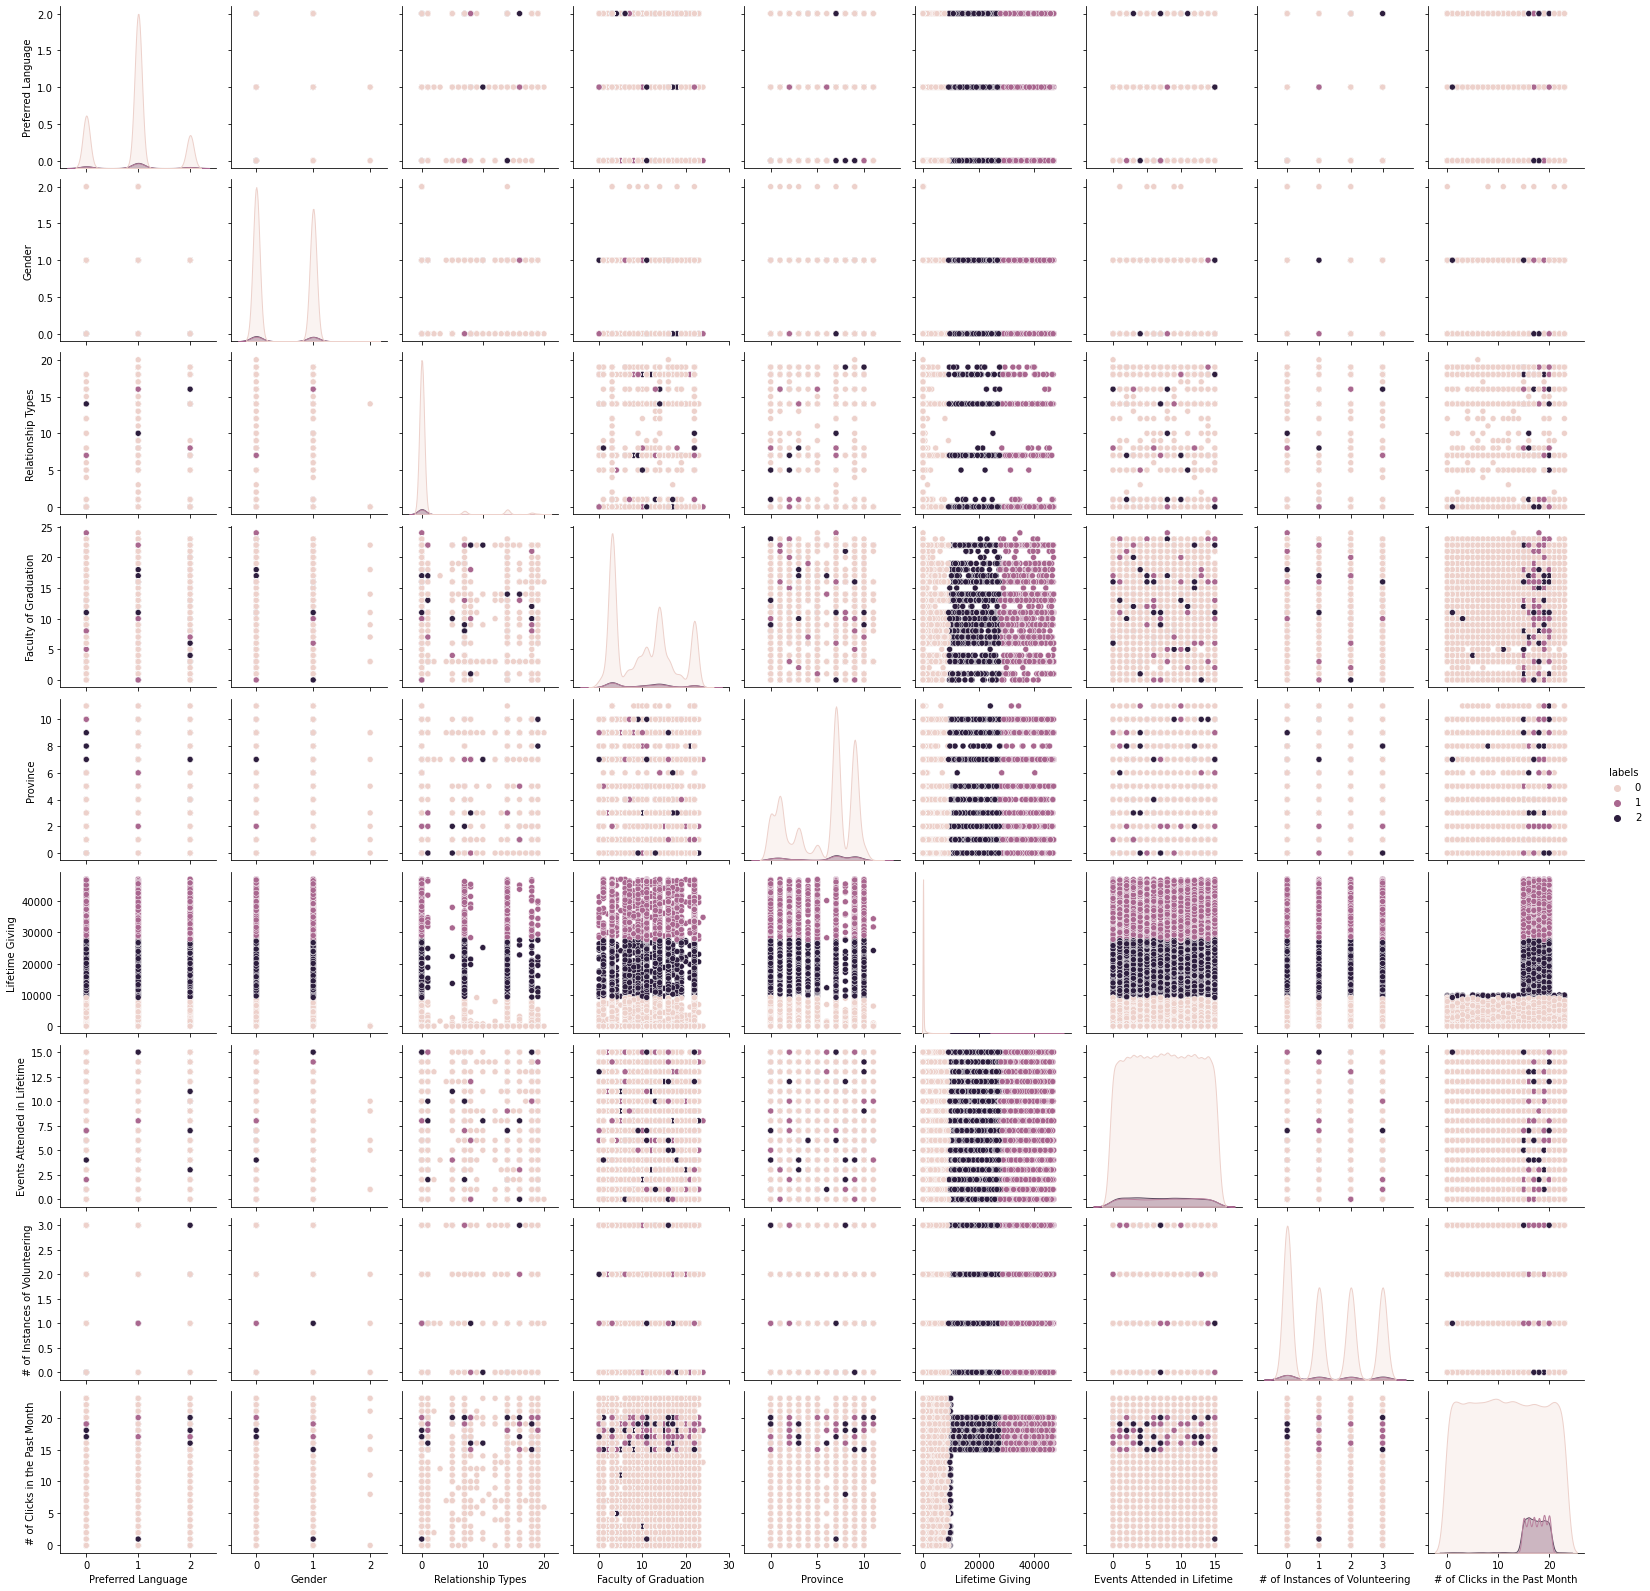

In [42]:
sns.pairplot(labeledColleges,hue='labels')

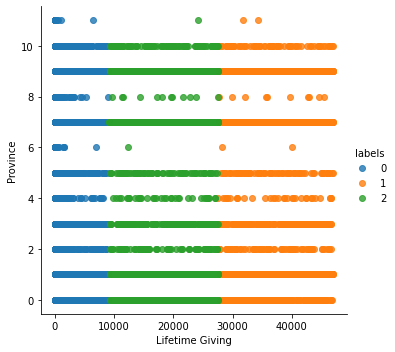

In [60]:
sns.lmplot(x='Lifetime Giving',y='Province',data=labeledColleges,hue='labels',fit_reg=False)

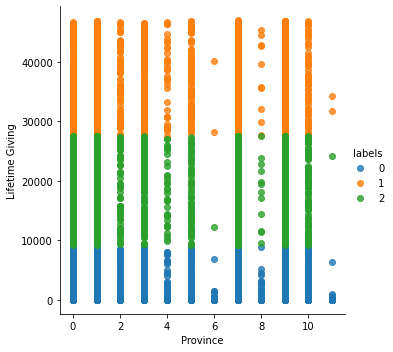

In [61]:
sns.lmplot(x='Province',y='Lifetime Giving',data=labeledColleges,hue='labels',fit_reg=False)

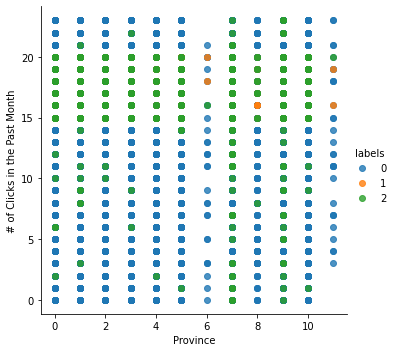

In [67]:
sns.lmplot(x='Province',y='# of Clicks in the Past Month',data=labeledColleges,hue='labels',fit_reg=False)

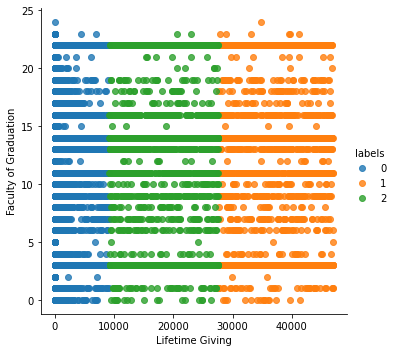

In [44]:
sns.lmplot(x='Lifetime Giving',y='Faculty of Graduation',data=labeledColleges,hue='labels',fit_reg=False)

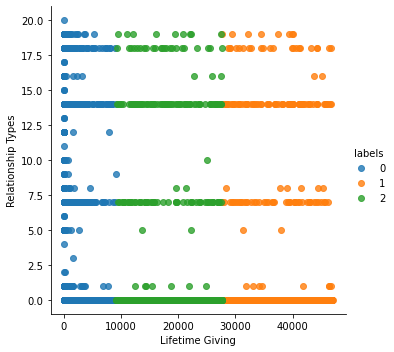

In [45]:
sns.lmplot(x='Lifetime Giving',y='Relationship Types',data=labeledColleges,hue='labels',fit_reg=False)

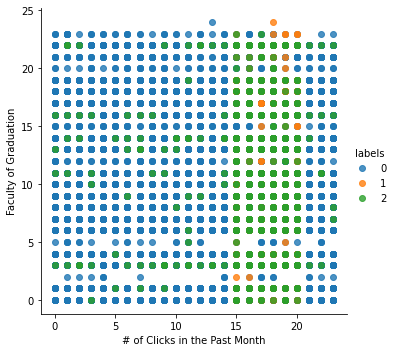

In [46]:
sns.lmplot(x='# of Clicks in the Past Month',y='Faculty of Graduation',data=labeledColleges,hue='labels',fit_reg=False)

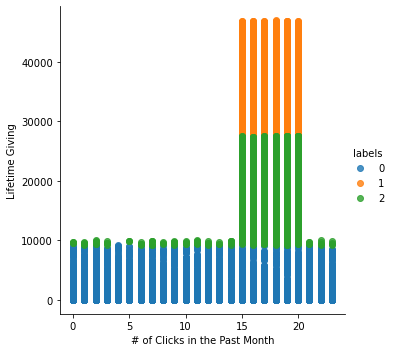

In [66]:
sns.lmplot(x='# of Clicks in the Past Month',y='Lifetime Giving',data=labeledColleges,hue='labels',fit_reg=False)

## Random Forest and Decision Tree

In [74]:
ds['Donor Class'] = np.nan

In [86]:
for i in range(0,len(ds)):
    if (ds.loc[i][6] == 0):
        ds.at[i,'Donor Class'] = 'No Donor'
    if (ds.loc[i][6] > 0) & (ds.loc[i][8] < 10000):
        ds.at[i,'Donor Class'] = 'Class1'
    if (ds.loc[i][6] >= 10000) & (ds.loc[i][8] < 30000):
        ds.at[i,'Donor Class'] = 'Class2'        
    if (ds.loc[i][6] >= 30000): 
        ds.at[i,'Donor Class'] = 'Class3'

In [88]:
print(ds.head())

  Preferred Language Gender Relationship Types Faculty of Graduation  \
0                  E      M           Graduate   Medicine -- General   
1                  E      M           Graduate       Arts -- General   
2                  E      F           Graduate    Science -- General   
3                         M           Graduate  Education -- General   
4                  E      M           Graduate            Management   

   Year of Graduation Province  Lifetime Giving  Year of Last Gift  \
0                1968       ON          73600.0             1997.0   
1                1958       NB           8035.0             1962.0   
2                1963       ON           9675.0             1961.0   
3                1960       BC           4070.0             1990.0   
4                1955       QC          13377.0             1970.0   

   Year of First Gift  Largest Gift  Events Attended in Lifetime  \
0              1978.0       22080.0                            0   
1         

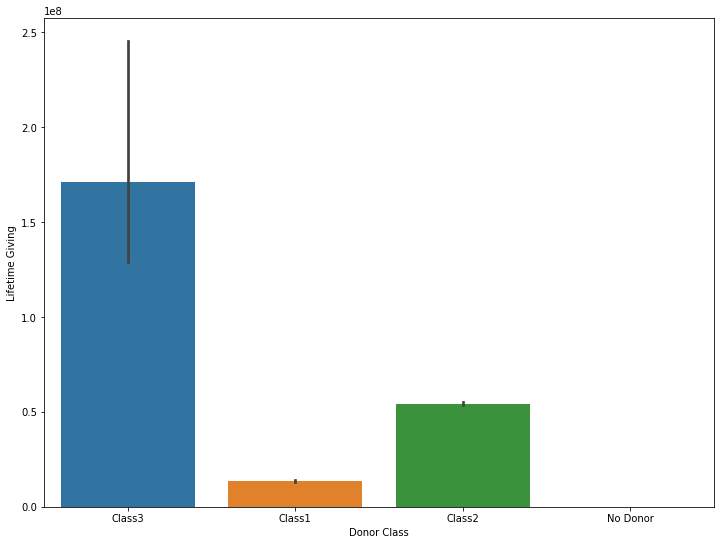

In [89]:
plt.figure(figsize=(12,9))
sns.barplot(data=ds,x='Donor Class',y='Lifetime Giving',estimator=sum)
plt.show()

In [91]:
dsn = ds[['Donor Class', 'Year of Graduation', 'Province',
         'Faculty of Graduation', 'Gender', 'Events Attended in Lifetime', '# of Clicks in the Past Month' ]]

In [92]:
print(dsn.isnull().sum())

Donor Class                      0
Year of Graduation               0
Province                         0
Faculty of Graduation            0
Gender                           0
Events Attended in Lifetime      0
# of Clicks in the Past Month    0
dtype: int64


In [93]:
ordinal_encoding_features = ['Year of Graduation', 'Events Attended in Lifetime', '# of Clicks in the Past Month']
one_hot_encoding_features = ['Province', 'Gender', 'Faculty of Graduation' ]

In [94]:
y = dsn['Donor Class']
dsn.drop('Donor Class', axis = 1, inplace = True)

In [99]:
from sklearn import preprocessing
import sklearn

In [100]:

label_encoder = sklearn.preprocessing.LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

In [101]:
print(y_encoded)

[2 0 0 ... 3 3 3]


In [102]:
label_encoder.classes_

array(['Class1', 'Class2', 'Class3', 'No Donor'], dtype=object)

In [103]:

ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
dsn[ordinal_encoding_features] = ordinal_encoder.fit_transform(dsn[ordinal_encoding_features])

In [104]:

one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
encoded_columns = one_hot_encoder.fit_transform(dsn[one_hot_encoding_features]).toarray()
feature_names = one_hot_encoder.get_feature_names(one_hot_encoding_features)
print(feature_names)
encoded_columns_df = pd.DataFrame(encoded_columns, columns = feature_names)
partial_data = dsn.drop(one_hot_encoding_features, axis = 1)
data_fully_encoded = pd.concat([partial_data, encoded_columns_df], axis = 1)

['Province_AB' 'Province_BC' 'Province_MB' 'Province_NB' 'Province_NL'
 'Province_NS' 'Province_NT' 'Province_ON' 'Province_PE' 'Province_QC'
 'Province_SK' 'Province_YT' 'Gender_F' 'Gender_M' 'Gender_U'
 'Faculty of Graduation_Agr&Env -- Dietetics'
 'Faculty of Graduation_Agr&Env -- General'
 'Faculty of Graduation_Agr&Env -- MSE'
 'Faculty of Graduation_Arts -- General'
 'Faculty of Graduation_Arts -- Information (Library) Studies'
 'Faculty of Graduation_Arts -- MSE'
 'Faculty of Graduation_Arts -- Social Work'
 'Faculty of Graduation_Continuing Education'
 'Faculty of Graduation_Dentistry'
 'Faculty of Graduation_Education -- General'
 'Faculty of Graduation_Engineer -- Architect'
 'Faculty of Graduation_Engineer -- General'
 'Faculty of Graduation_Engineer -- Urban' 'Faculty of Graduation_Law'
 'Faculty of Graduation_Management'
 'Faculty of Graduation_Medicine -- Com Sci'
 'Faculty of Graduation_Medicine -- General'
 'Faculty of Graduation_Medicine -- Nursing'
 'Faculty of Gradua

In [105]:
print(dsn.shape)
print(data_fully_encoded.shape)

(50000, 6)
(50000, 43)


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_fully_encoded, y_encoded, test_size = 0.3, train_size = 0.7)

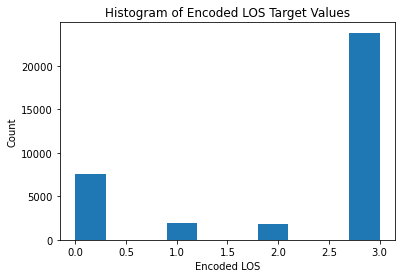

In [107]:
plt.hist(y_train)
plt.xlabel('Encoded LOS')
plt.ylabel('Count')
plt.title('Histogram of Encoded LOS Target Values')
plt.show()

In [108]:
from statistics import mode
baseline = mode(y_train)
print('mode of target variable:', baseline)
baseline_pred = baseline * np.ones(len(y_test))
print(round(sklearn.metrics.accuracy_score(baseline_pred, y_test)*100, 2))

mode of target variable: 3
67.49


In [109]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
print(dt_model.feature_importances_)
print(X_train.columns)

[2.35754761e-01 2.02943163e-01 2.20673174e-01 2.15202641e-02
 2.24400136e-02 9.17871213e-03 1.63178387e-02 4.98528308e-03
 1.04646569e-02 5.65040800e-04 3.28328430e-02 1.82017963e-03
 2.80781663e-02 8.42959370e-03 2.74230905e-04 2.80749349e-02
 2.82313163e-02 1.79596790e-04 3.36587786e-03 5.49380230e-03
 1.32345342e-04 1.41926471e-02 5.09605128e-03 4.79601428e-04
 5.87850603e-03 5.40861428e-03 3.84697154e-03 5.98674374e-03
 3.80292947e-03 1.21624814e-02 1.07549076e-03 8.09087936e-03
 1.61238800e-02 3.67305361e-04 9.46319385e-03 2.65223710e-03
 5.79470638e-03 4.08410728e-03 8.19259059e-04 1.13645719e-03
 1.13050748e-02 4.77068827e-04 0.00000000e+00]
Index(['Year of Graduation', 'Events Attended in Lifetime',
       '# of Clicks in the Past Month', 'Province_AB', 'Province_BC',
       'Province_MB', 'Province_NB', 'Province_NL', 'Province_NS',
       'Province_NT', 'Province_ON', 'Province_PE', 'Province_QC',
       'Province_SK', 'Province_YT', 'Gender_F', 'Gender_M', 'Gender_U',
      

In [111]:
print('Tree depth: ', dt_model.get_depth())
print('Number of leaf nodes: ', dt_model.get_n_leaves())

Tree depth:  42
Number of leaf nodes:  13224


In [112]:
print('training set accuracy: ', round(dt_model.score(X_train, y_train) * 100, 2))

training set accuracy:  99.42


In [113]:
dt_model_predictions = dt_model.predict(X_test)
print(dt_model_predictions)
print(y_test)

[3 3 3 ... 3 0 3]
[3 3 3 ... 0 3 3]


In [114]:
print('test set accuracy: ', round(dt_model.score(X_test, y_test)*100, 2))

test set accuracy:  55.85


In [116]:
max_depth = 3
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  3
Number of leaf nodes:  8
training set accuracy:  68.09
test set accuracy:  67.67


In [117]:
max_depth = 5
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  5
Number of leaf nodes:  29
training set accuracy:  68.12
test set accuracy:  67.67


In [118]:
max_depth = 7
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  7
Number of leaf nodes:  106
training set accuracy:  68.34
test set accuracy:  67.39


In [119]:
max_depth = 10
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  10
Number of leaf nodes:  551
training set accuracy:  69.5
test set accuracy:  66.93


In [120]:
max_depth = 15
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('training set accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  15
Number of leaf nodes:  3261
training set accuracy:  76.33
test set accuracy:  62.89


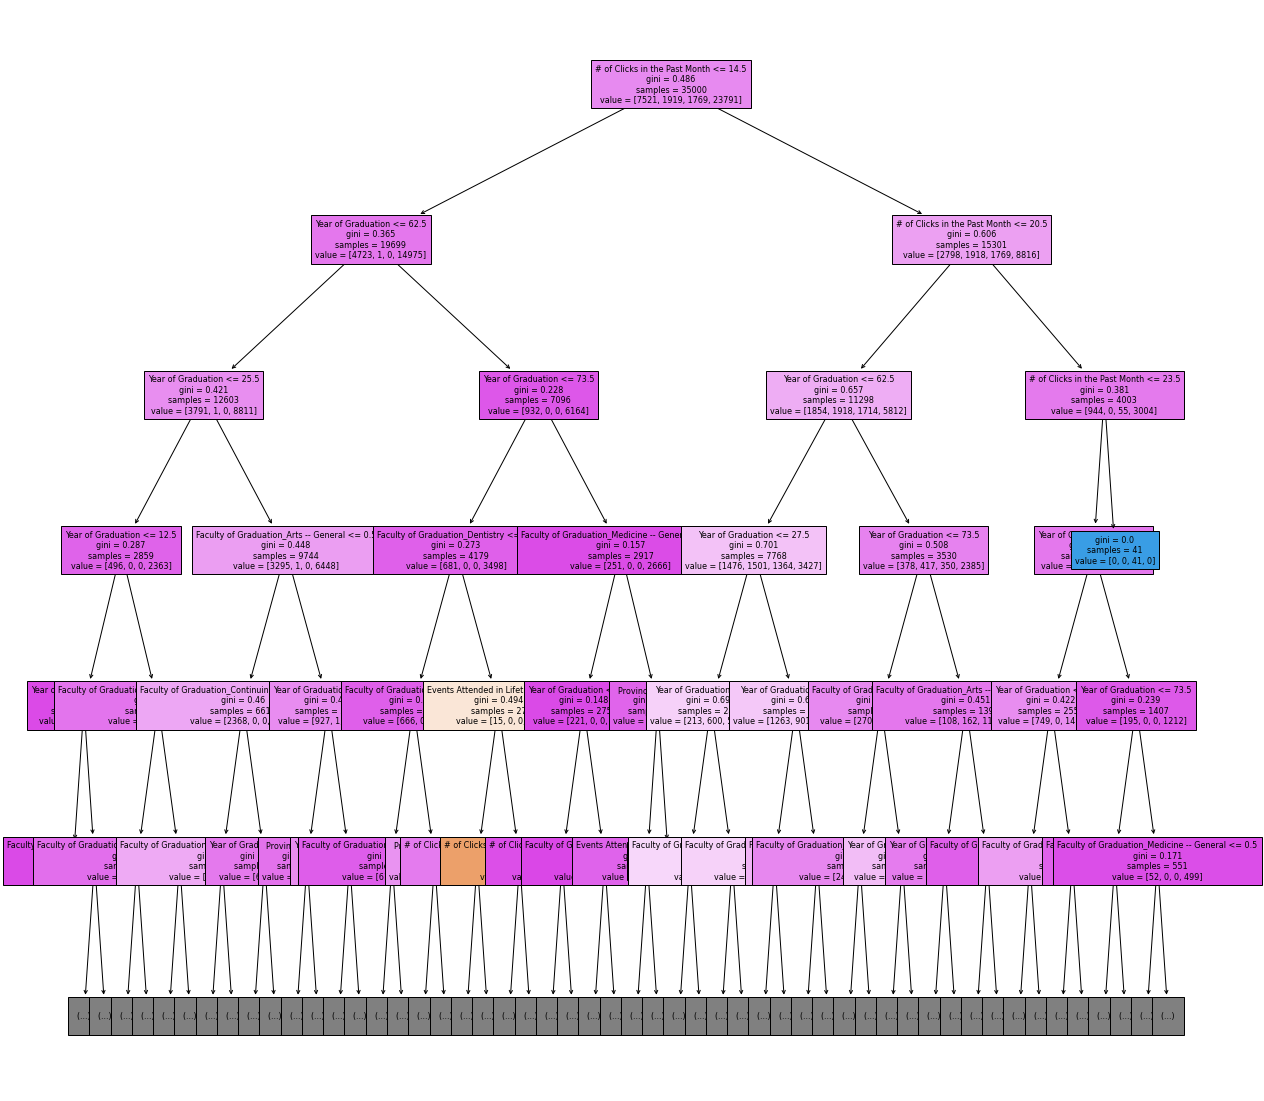

In [121]:
plt.figure(figsize=(20,20))
tree_plot = tree.plot_tree(dt_model_params, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 5)
plt.show()

# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

dt_model_rf = RandomForestClassifier(random_state = 0)

dt_model_rf.fit(X_train, y_train)

predict = dt_model_rf.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6370666666666667


Changing random state to 1

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

dt_model_rf = RandomForestClassifier(random_state = 1)

dt_model_rf.fit(X_train, y_train)

predict = dt_model_rf.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6401333333333333


finding best number of estimator

In [124]:
from sklearn.ensemble import RandomForestClassifier

dt_model_rf_100 = RandomForestClassifier(n_estimators=200, random_state=0)

dt_model_rf_100.fit(X_train, y_train)

predict = dt_model_rf_100.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.639


In [125]:
from sklearn.ensemble import RandomForestClassifier

dt_model_rf_100 = RandomForestClassifier(n_estimators=100, random_state=0)

dt_model_rf_100.fit(X_train, y_train)

predict = dt_model_rf_100.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6370666666666667


In [126]:
from sklearn.ensemble import RandomForestClassifier

dt_model_rf_100 = RandomForestClassifier(n_estimators=150, random_state=0)

# Fit the model
dt_model_rf_100.fit(X_train, y_train)

# Predict the model 
predict = dt_model_rf_100.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6382666666666666


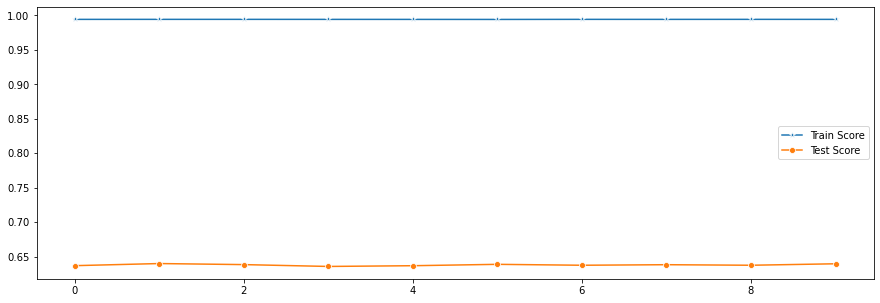

In [127]:
test_score_list = []
train_score_list = []

for i in range(0,10):
    dt_model_rf_1 = RandomForestClassifier(random_state=i)
    dt_model_rf_1.fit(X_train, y_train)
    test_score_list.append(dt_model_rf_1.score(X_test, y_test))
    train_score_list.append(dt_model_rf_1.score(X_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(range(0,10),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(0,10),test_score_list,marker='o',label='Test Score')

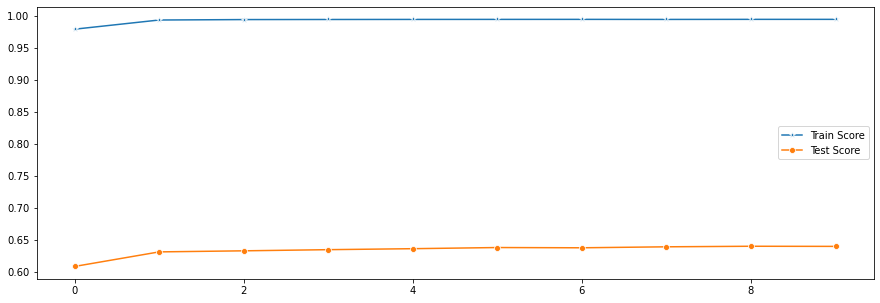

In [128]:
test_score_list = []
train_score_list = []

list_n_estimators = [10,40,50,60,70,80,90,100,150,200]


for i in range(0,len(list_n_estimators)):
    dt_model_rf_2 = RandomForestClassifier(n_estimators=list_n_estimators[i], random_state=5)
    dt_model_rf_2.fit(X_train, y_train)
    test_score_list.append(dt_model_rf_2.score(X_test, y_test))
    train_score_list.append(dt_model_rf_2.score(X_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(range(0,len(list_n_estimators)),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(0,len(list_n_estimators)),test_score_list,marker='o',label='Test Score')

In [132]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 5
criterion = 'gini'
n_estimators = 200
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators, random_state = 1)
dt_model_rf.fit(X_train, y_train)
print('training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

training set accuracy:  67.97
test set accuracy:  67.49


In [135]:
last_rfc = RandomForestClassifier(n_estimators=200, random_state=1)

last_rfc.fit(X_train,y_train)

predict = last_rfc.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6397333333333334


In [136]:
y_pred_en = last_rfc.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with best parameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with best parameters: 0.6397


In [138]:
y_pred_train_en = last_rfc.predict(X_train)

y_pred_train_en

array([0, 3, 3, ..., 3, 0, 0])

In [139]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9942


In [140]:

print('Training set score: {:.4f}'.format(last_rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(last_rfc.score(X_test, y_test)))

Training set score: 0.9942
Test set score: 0.6397


In [141]:
from sklearn.metrics import confusion_matrix
cm_last_rfc = RandomForestClassifier(n_estimators=150, random_state=1)

cm_last_rfc.fit(X_train, y_train)

y_pred_cm = cm_last_rfc.predict(X_test)
y_true = y_test

cm_rfc = confusion_matrix(y_true, y_pred_cm)
cm_rfc

array([[ 495,   85,   47, 2648],
       [  86,   90,   80,  585],
       [  67,   79,   80,  535],
       [ 857,  184,  159, 8923]], dtype=int64)

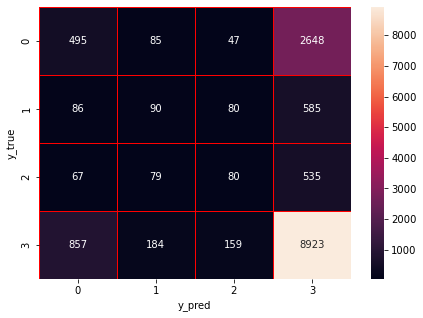

In [142]:
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_rfc, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()